# Loading data :

In [14]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

# Question 1 :

C:\Users\33786\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.49347e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\33786\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.64526e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


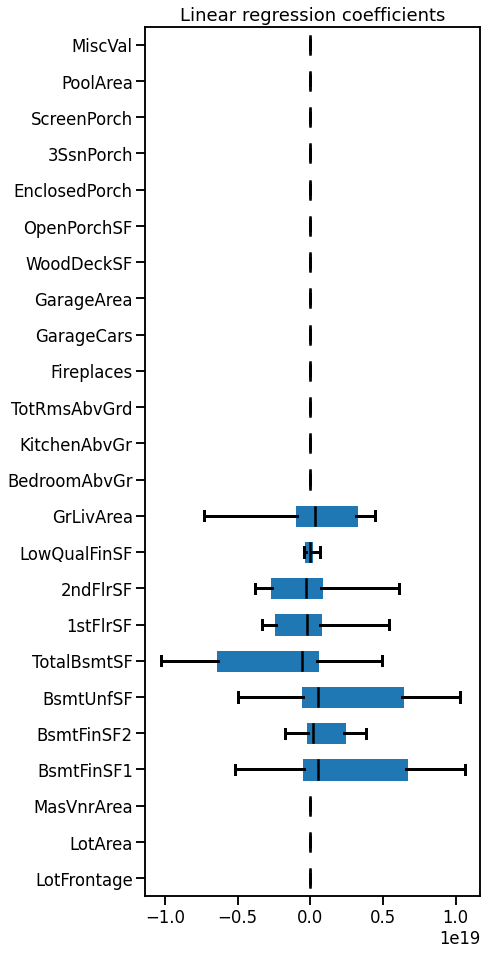

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

ridge_regression = make_pipeline(
    StandardScaler(),
    Ridge(alpha=0),
)

cv_results = cross_validate(ridge_regression, data_numerical, target,
                            cv=10,# scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=numerical_features)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_linear_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Linear regression coefficients")

In [18]:
coefs

[array([-3.13233076e+03,  4.93365832e+03,  7.84939709e+03,  1.06438477e+19,
         3.80367331e+18,  1.03039479e+19, -1.03000598e+19, -2.74204672e+18,
        -3.06937601e+18, -3.36652312e+17,  3.72759251e+18, -1.16399506e+04,
        -1.13971785e+04,  1.39027804e+04,  7.25354206e+03,  2.00249017e+04,
        -7.90854891e+03,  4.07661840e+03,  2.52187791e+03, -5.90185453e+03,
         1.43201620e+03, -2.19853336e+03, -2.33867563e+03, -1.23306111e+03]),
 array([ 2.89039319e+01, -1.24590613e+02,  6.29951637e+03, -5.16832098e+18,
        -1.76759509e+18, -4.93816441e+18,  4.96732312e+18, -4.59011217e+17,
        -5.14096335e+17, -4.85924030e+16,  6.22967586e+17, -1.19918662e+04,
        -1.26464968e+04,  1.20225716e+04,  3.76594619e+03,  2.33958270e+04,
        -5.14224593e+03,  6.07861881e+03,  1.05733665e+03, -2.68727604e+03,
         2.27195519e+03, -4.03603453e+02, -2.11500332e+03, -3.41779913e+02]),
 array([-2.05766353e+01,  4.18420571e+02,  5.28758176e+03,  7.41558674e+18,
        

# Solution 1 :

C:\Users\33786\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.49347e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\33786\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.64526e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


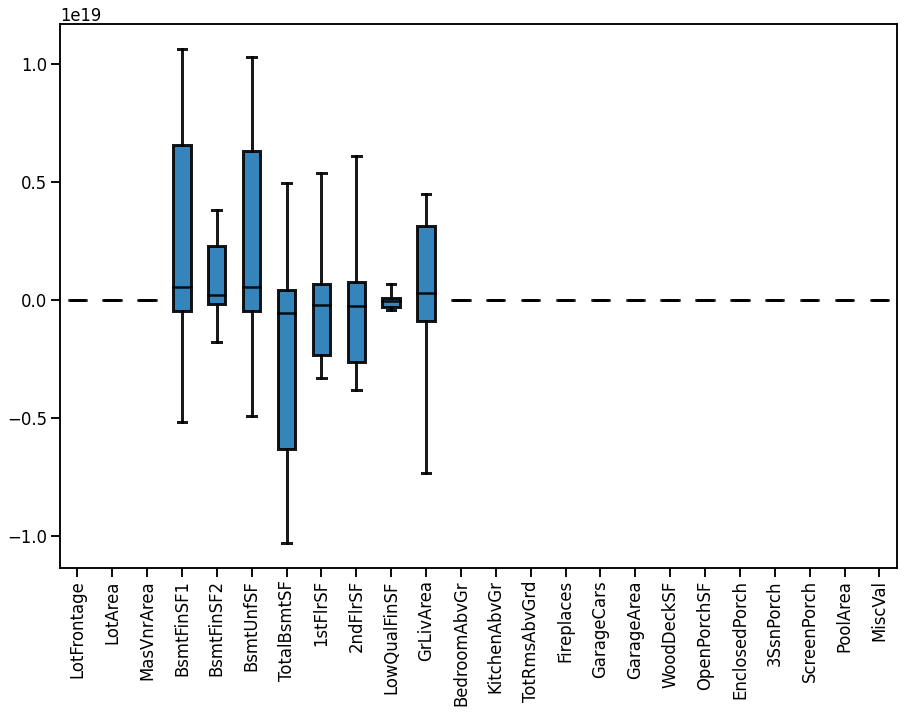

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), Ridge(alpha=0))
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [pipeline[-1].coef_ for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

# Question 2 :

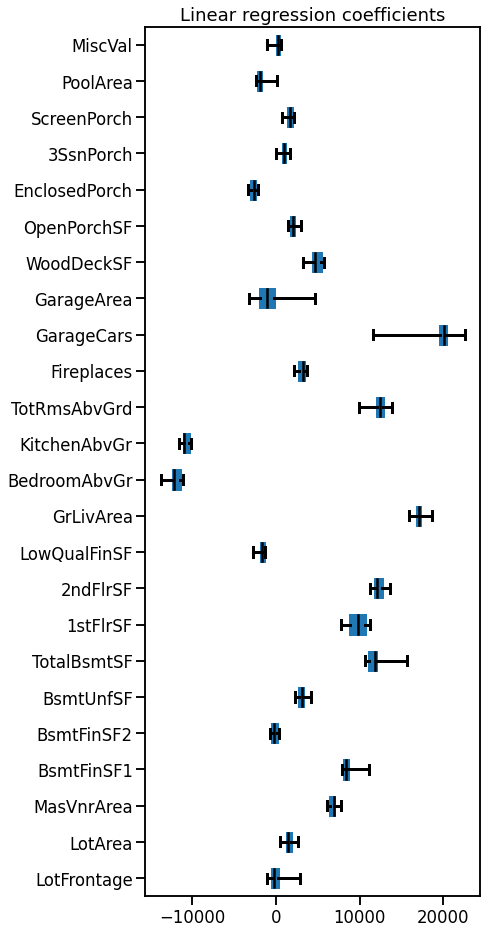

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

ridge_regression = make_pipeline(
    StandardScaler(),
    Ridge(),
)

cv_results = cross_validate(ridge_regression, data_numerical, target,
                            cv=10,# scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=numerical_features)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_linear_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Linear regression coefficients")

# Solution 2 :

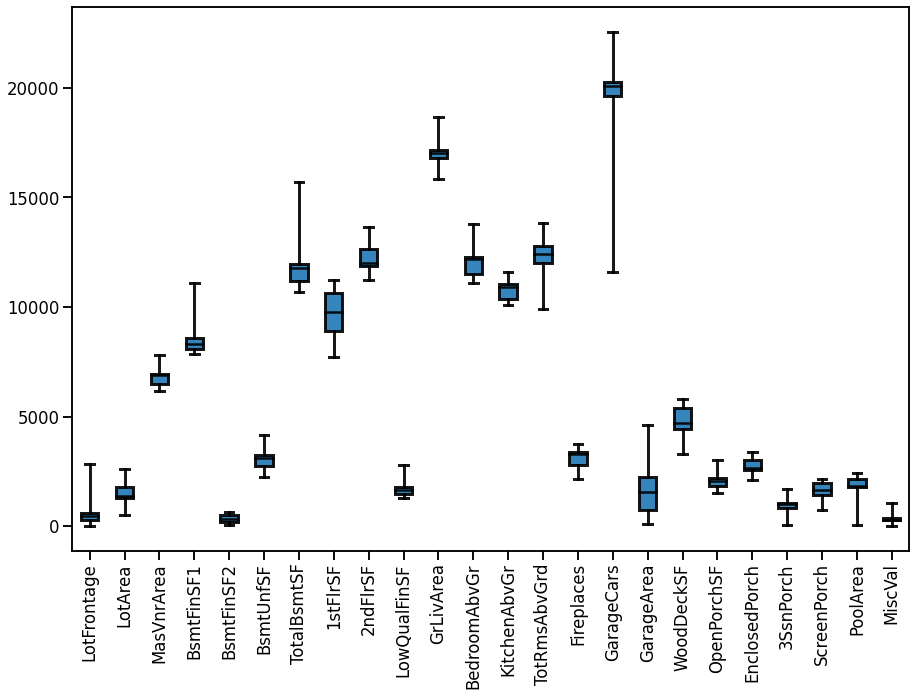

In [5]:
from sklearn.linear_model import Ridge

model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)

coefs = [pipeline[-1].coef_ for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

# Question 3 idem

# Question 4 :

In [65]:
from sklearn.linear_model import Ridge

numerical_features_without_garageArea = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]
data_numerical_without_garageArea = data[numerical_features_without_garageArea]

model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
cv_results = cross_validate(
    model, data_numerical_without_garageArea, target, cv=10, return_estimator=True
)

coefs = [pipeline[-1].coef_ for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features_without_garageArea)
coefs.describe().loc[["min", "max"]]

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

KeyError: "None of [Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',\n       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',\n       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',\n       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',\n       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],\n      dtype='object')] are in the [columns]"

# Question 7 :

In [25]:
import numpy as np
from sklearn.linear_model import RidgeCV

alphas=np.logspace(-3, 3, num=101)
ridge = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, store_cv_values=True))

cv_results = cross_validate(
    ridge, data_numerical_without_garageArea, target, scoring="neg_mean_squared_error", cv=10, return_estimator=True
)

In [31]:
tuned_alphas = [pipeline[-1].alpha_ for pipeline in cv_results["estimator"]]
tuned_alphas

[331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 63.0957344480193,
 331.13112148259074]

# Question 8:

In [50]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [39]:
data

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


# Question 9 :

### Logistic regression :

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

logistic_regression = make_pipeline(
    StandardScaler(),
    LogisticRegression(),
)

cv_results_logistic_regression = cross_validate(
    logistic_regression, data, target, cv=10, return_estimator=True, return_train_score=True
)

### Dummy classifier :

In [52]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier()

cv_results_dummy_classifier = cross_validate(
    dummy_classifier, data, target, cv=10, return_estimator=True, return_train_score=True
)

### Comparaison modèles :

In [53]:
(cv_results_logistic_regression['test_score']>cv_results_dummy_classifier['test_score']).sum()

10

# Question 10 :

In [63]:
coefs = [pipeline[-1].coef_ for pipeline in cv_results_logistic_regression["estimator"]]
coefs = np.array(coefs).reshape(-1,4)
coefs = pd.DataFrame(coefs, columns=data.columns)

<AxesSubplot:>

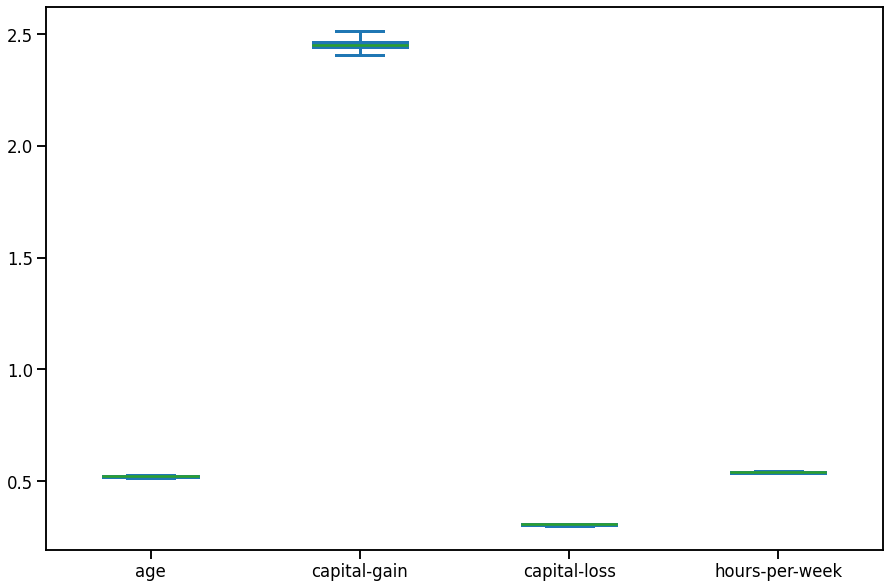

In [67]:
_, ax = plt.subplots(figsize=(15, 10))
coefs.abs().plot.box(ax=ax)

# Question 11 :

In [70]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [78]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = selector(dtype_include=object)(data)
numerical_columns = selector(dtype_exclude=object)(data)

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    (StandardScaler(), numerical_columns),
)
model = make_pipeline(preprocessor, LogisticRegression(max_iter=5000))

cv_results_full_model = cross_validate(
    model, data, target, cv=10, return_estimator=True, n_jobs=-1
)

In [79]:
(cv_results_full_model['test_score']>cv_results_logistic_regression['test_score']).sum()

10

# Question 12 :

In [80]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["onehotencoder"]
                             .get_feature_names_out(categorical_columns)).tolist()
feature_names += numerical_columns
feature_names

['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Fa

In [115]:
coefs = [pipeline[-1].coef_[0] for pipeline in cv_results_full_model["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)

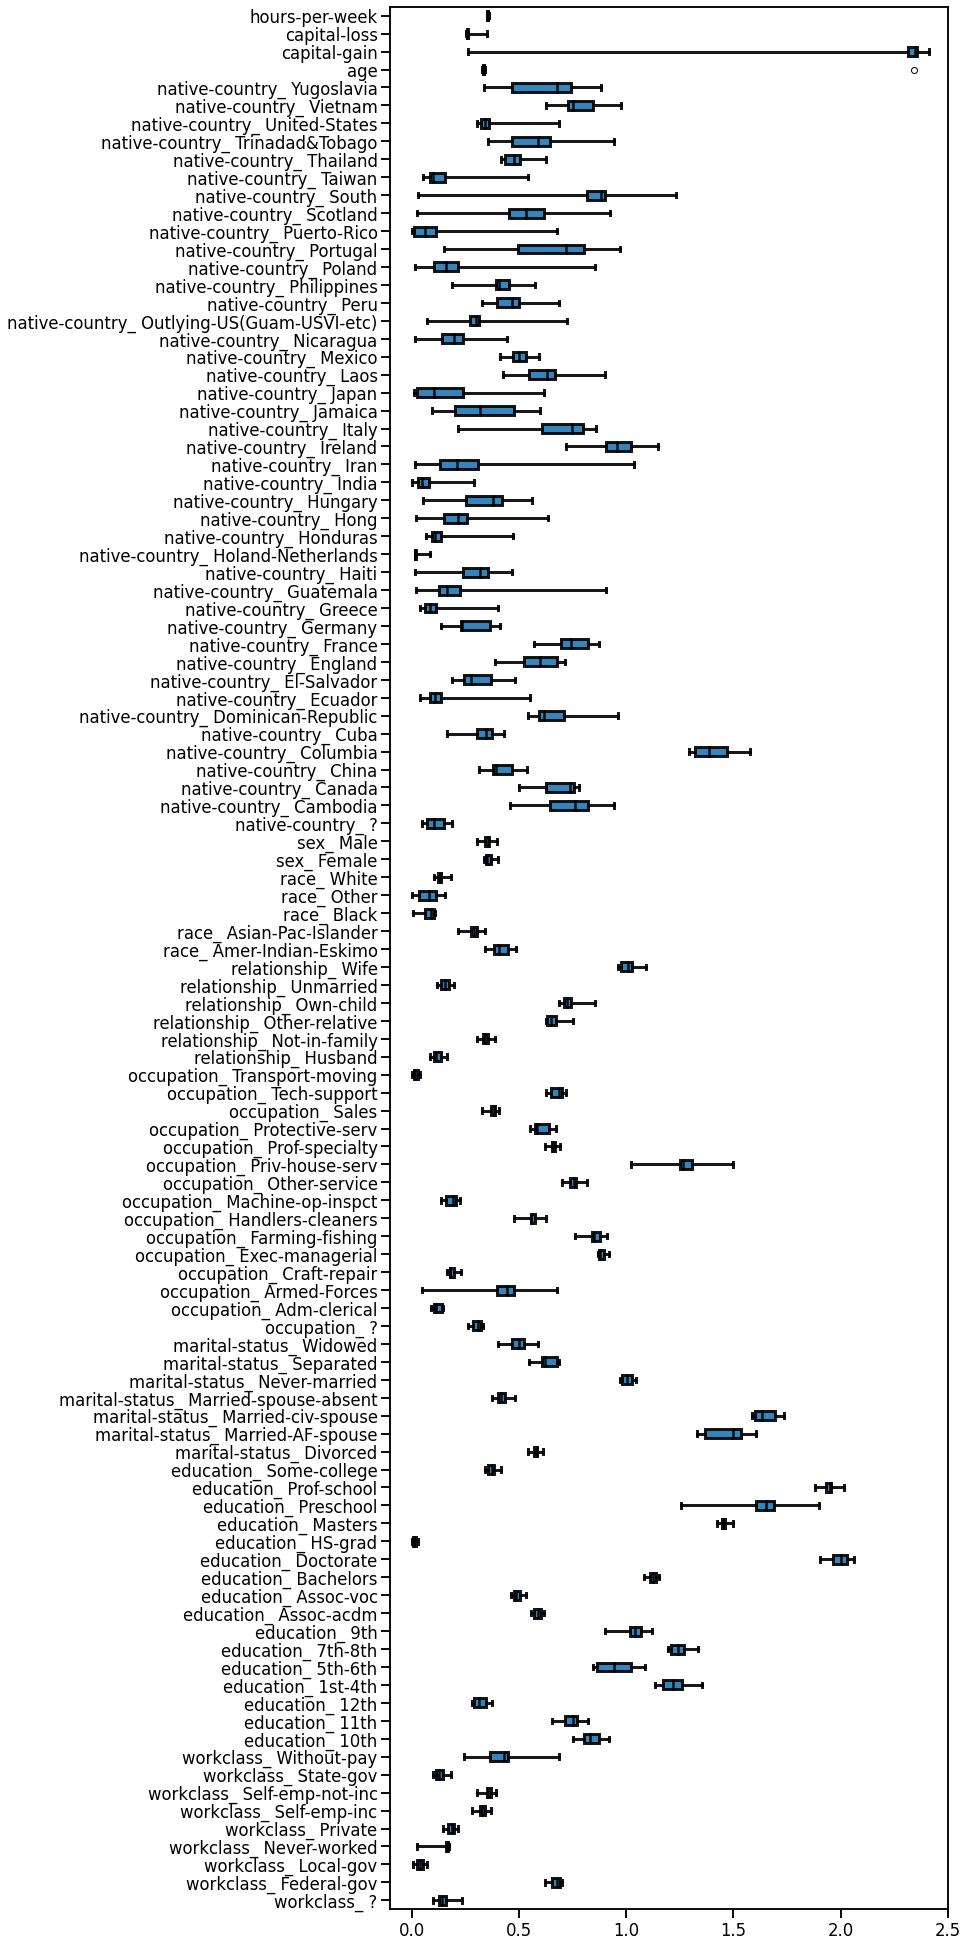

In [117]:
boxplot_property = {
    "vert": False,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(10, 35))
ax.set(xlim=(-0.1, 2.5))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

# Question 13 :

In [121]:
model = make_pipeline(preprocessor, LogisticRegression(C=0.01, max_iter=5000))

cv_results_full_model_bis = cross_validate(
    model, data, target, cv=10, return_estimator=True, n_jobs=-1
)

In [122]:
coefs = [pipeline[-1].coef_[0] for pipeline in cv_results_full_model_bis["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)

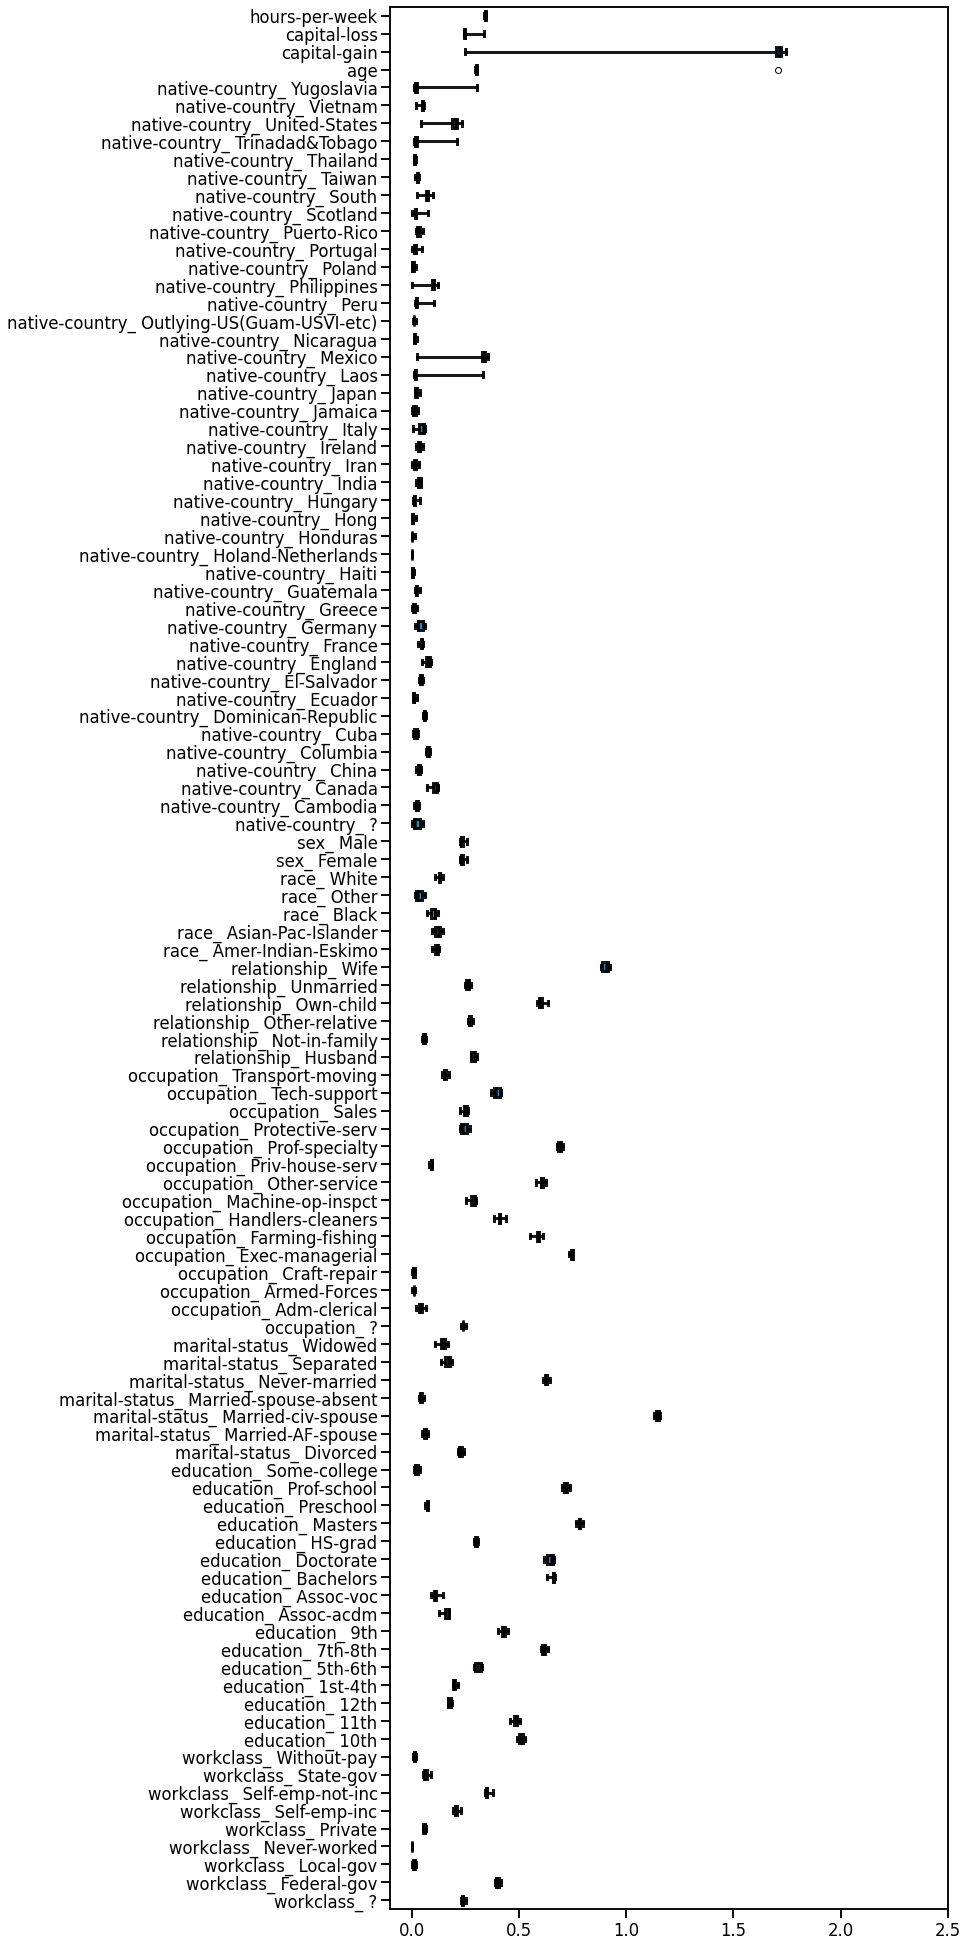

In [123]:
boxplot_property = {
    "vert": False,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(10, 35))
ax.set(xlim=(-0.1, 2.5))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)